In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from process_data import load_data, plot, write_predictions


In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)


/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [13]:
# Load the data
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")

# Define features (excluding label)
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
            "game_completed"
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]
features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]
label_feature = "home_win"

# Training, validation, and test years
training_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
validation_years = [2023]
test_years = [2024]

# Load training data (history_length=0 means no history, just current row)
history_length = 0
training_data = load_data(interpolated_dir, training_years, history_length, features, label_feature, replace_nan_val=0, train=True)

# Load validation data
validation_data = load_data(interpolated_dir, validation_years, history_length, features, label_feature, replace_nan_val=0, train=False)

# Load test data
test_data = load_data(interpolated_dir, test_years, history_length, features, label_feature, replace_nan_val=0, train=False)


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN foun

In [10]:
print(f"Number of training timesteps: {len(training_data)}")
print(f"Number of validation timesteps: {len(validation_data)}")
print(f"Number of test timesteps: {len(test_data)}")


Number of training timesteps: 201
Number of validation timesteps: 201
Number of test timesteps: 201


In [14]:
# Import SVM model setup function
from models.svm import setup_svm_models

# Setup SVM models with validation data
# setup_svm_models expects training_data and test_data in format: {timestep: [{"rows": array, "label": float}]}
# which is exactly what load_data returns
models = setup_svm_models(
    training_data=training_data,
    test_data=validation_data,  # Use validation data for evaluation during training
    numeric_features=numeric_features,
    other_features=other_features,
    all_features=features,
    use_calibration=False,
    optimize_hyperparams=False,
    n_trials=50
)


Processing timestep: 0.0
Timestep 0.0 : Training Loss = 0.6171, Accuracy = 0.6625, Test Loss = 0.6536, Test Accuracy = 0.6190
Processing timestep: 0.005
Timestep 0.005 : Training Loss = 0.6173, Accuracy = 0.6445, Test Loss = 0.6647, Test Accuracy = 0.5906
Processing timestep: 0.01
Timestep 0.01 : Training Loss = 0.6133, Accuracy = 0.6472, Test Loss = 0.6678, Test Accuracy = 0.6042
Processing timestep: 0.015
Timestep 0.015 : Training Loss = 0.6279, Accuracy = 0.6371, Test Loss = 0.6578, Test Accuracy = 0.6183
Processing timestep: 0.02
Timestep 0.02 : Training Loss = 0.6222, Accuracy = 0.6513, Test Loss = 0.6653, Test Accuracy = 0.6133
Processing timestep: 0.025
Timestep 0.025 : Training Loss = 0.6315, Accuracy = 0.6414, Test Loss = 0.6534, Test Accuracy = 0.6183
Processing timestep: 0.03
Timestep 0.03 : Training Loss = 0.6147, Accuracy = 0.6559, Test Loss = 0.6628, Test Accuracy = 0.5895
Processing timestep: 0.035
Timestep 0.035 : Training Loss = 0.6264, Accuracy = 0.6384, Test Loss = 0

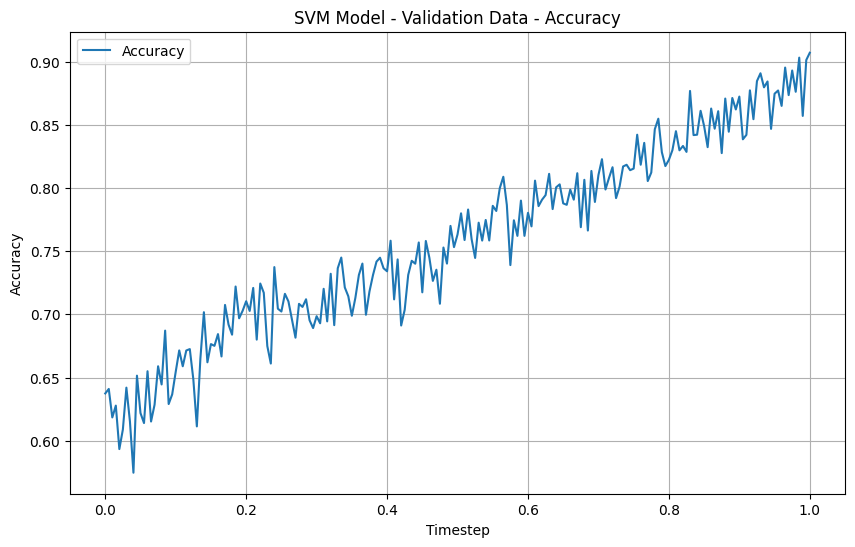

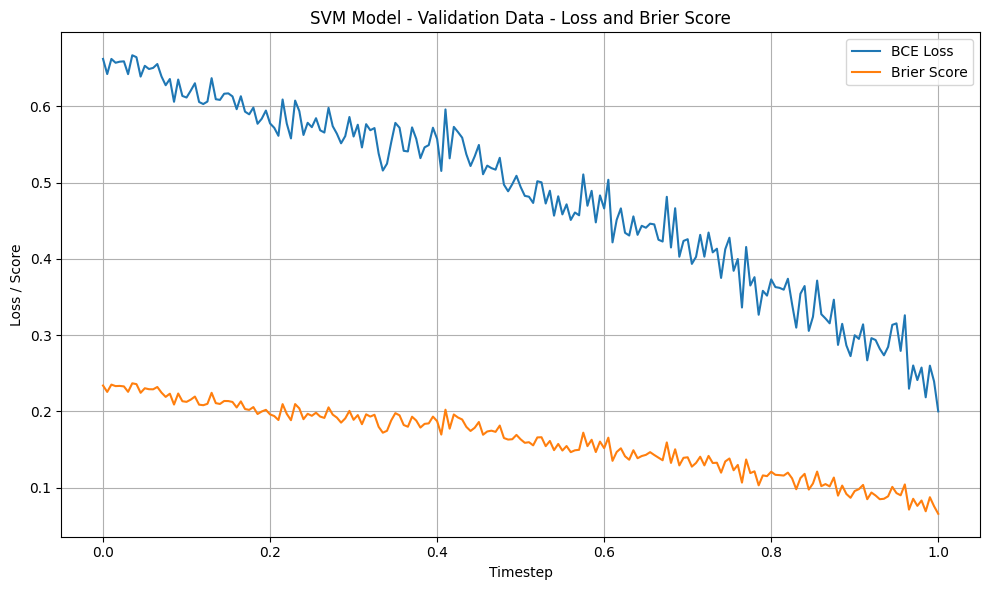

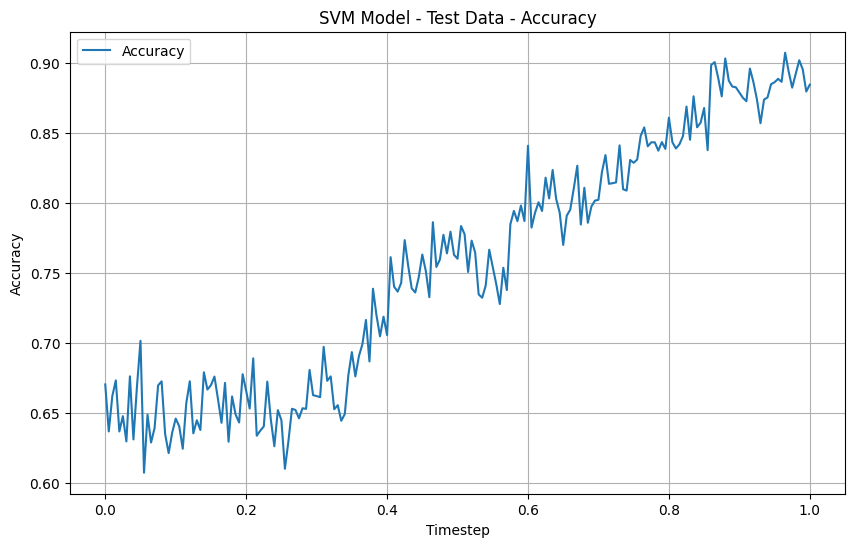

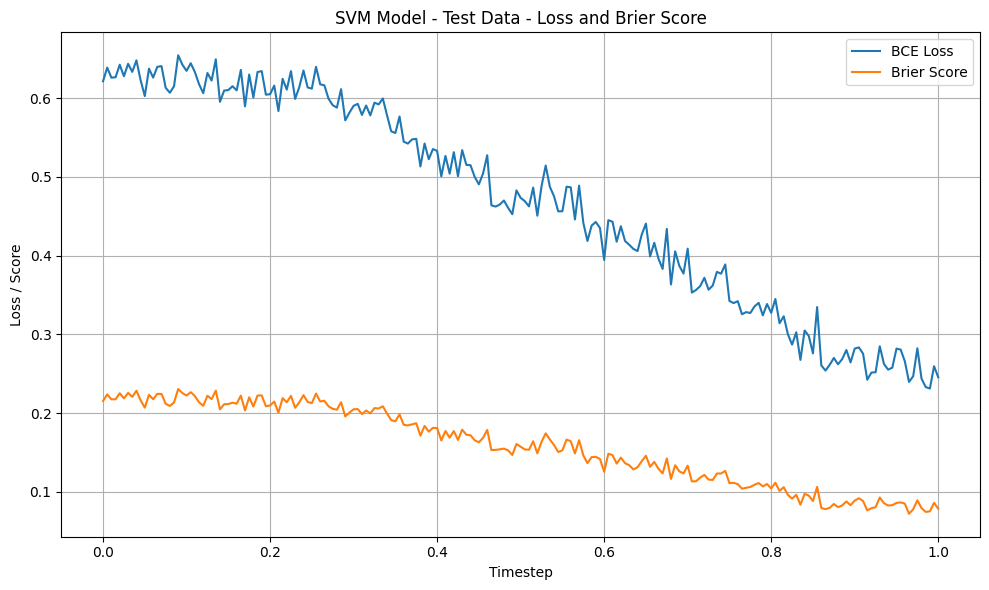

In [6]:
# Plot accuracy and loss on validation data
plot(models, validation_data, title="SVM Model - Validation Data")

# Plot accuracy and loss on test data
plot(models, test_data, title="SVM Model - Test Data")


In [ ]:
# Save the models
import pickle
filename = 'svm_model.pickle'
pickle.dump(models, open(filename, 'wb'))
print(f"Models saved to {filename}")


In [ ]:
model = models[0.99]
features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]
data_point = [0.99, 0.5, -1, 1, 1, 1, 1, 1, 5, 0, 0]
model.predict_proba([data_point])

array([[0.66417386, 0.33582614]])

In [7]:
write_predictions(models, interpolated_dir, test_years, history_length, features, replace_nan_val=0, phat_b="phat_b_SVM")


Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces